In [1]:
from io import BytesIO
import requests
from autogen_agentchat.messages import TextMessage, MultiModalMessage
from autogen_core import Image as AGImage
from PIL import Image
from dotenv import load_dotenv
from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_agentchat.agents import AssistantAgent
from autogen_core import CancellationToken
from IPython.display import display, Markdown
from pydantic import BaseModel, Field
from typing import Literal

load_dotenv(override=True)


True

## Multi-model conversation


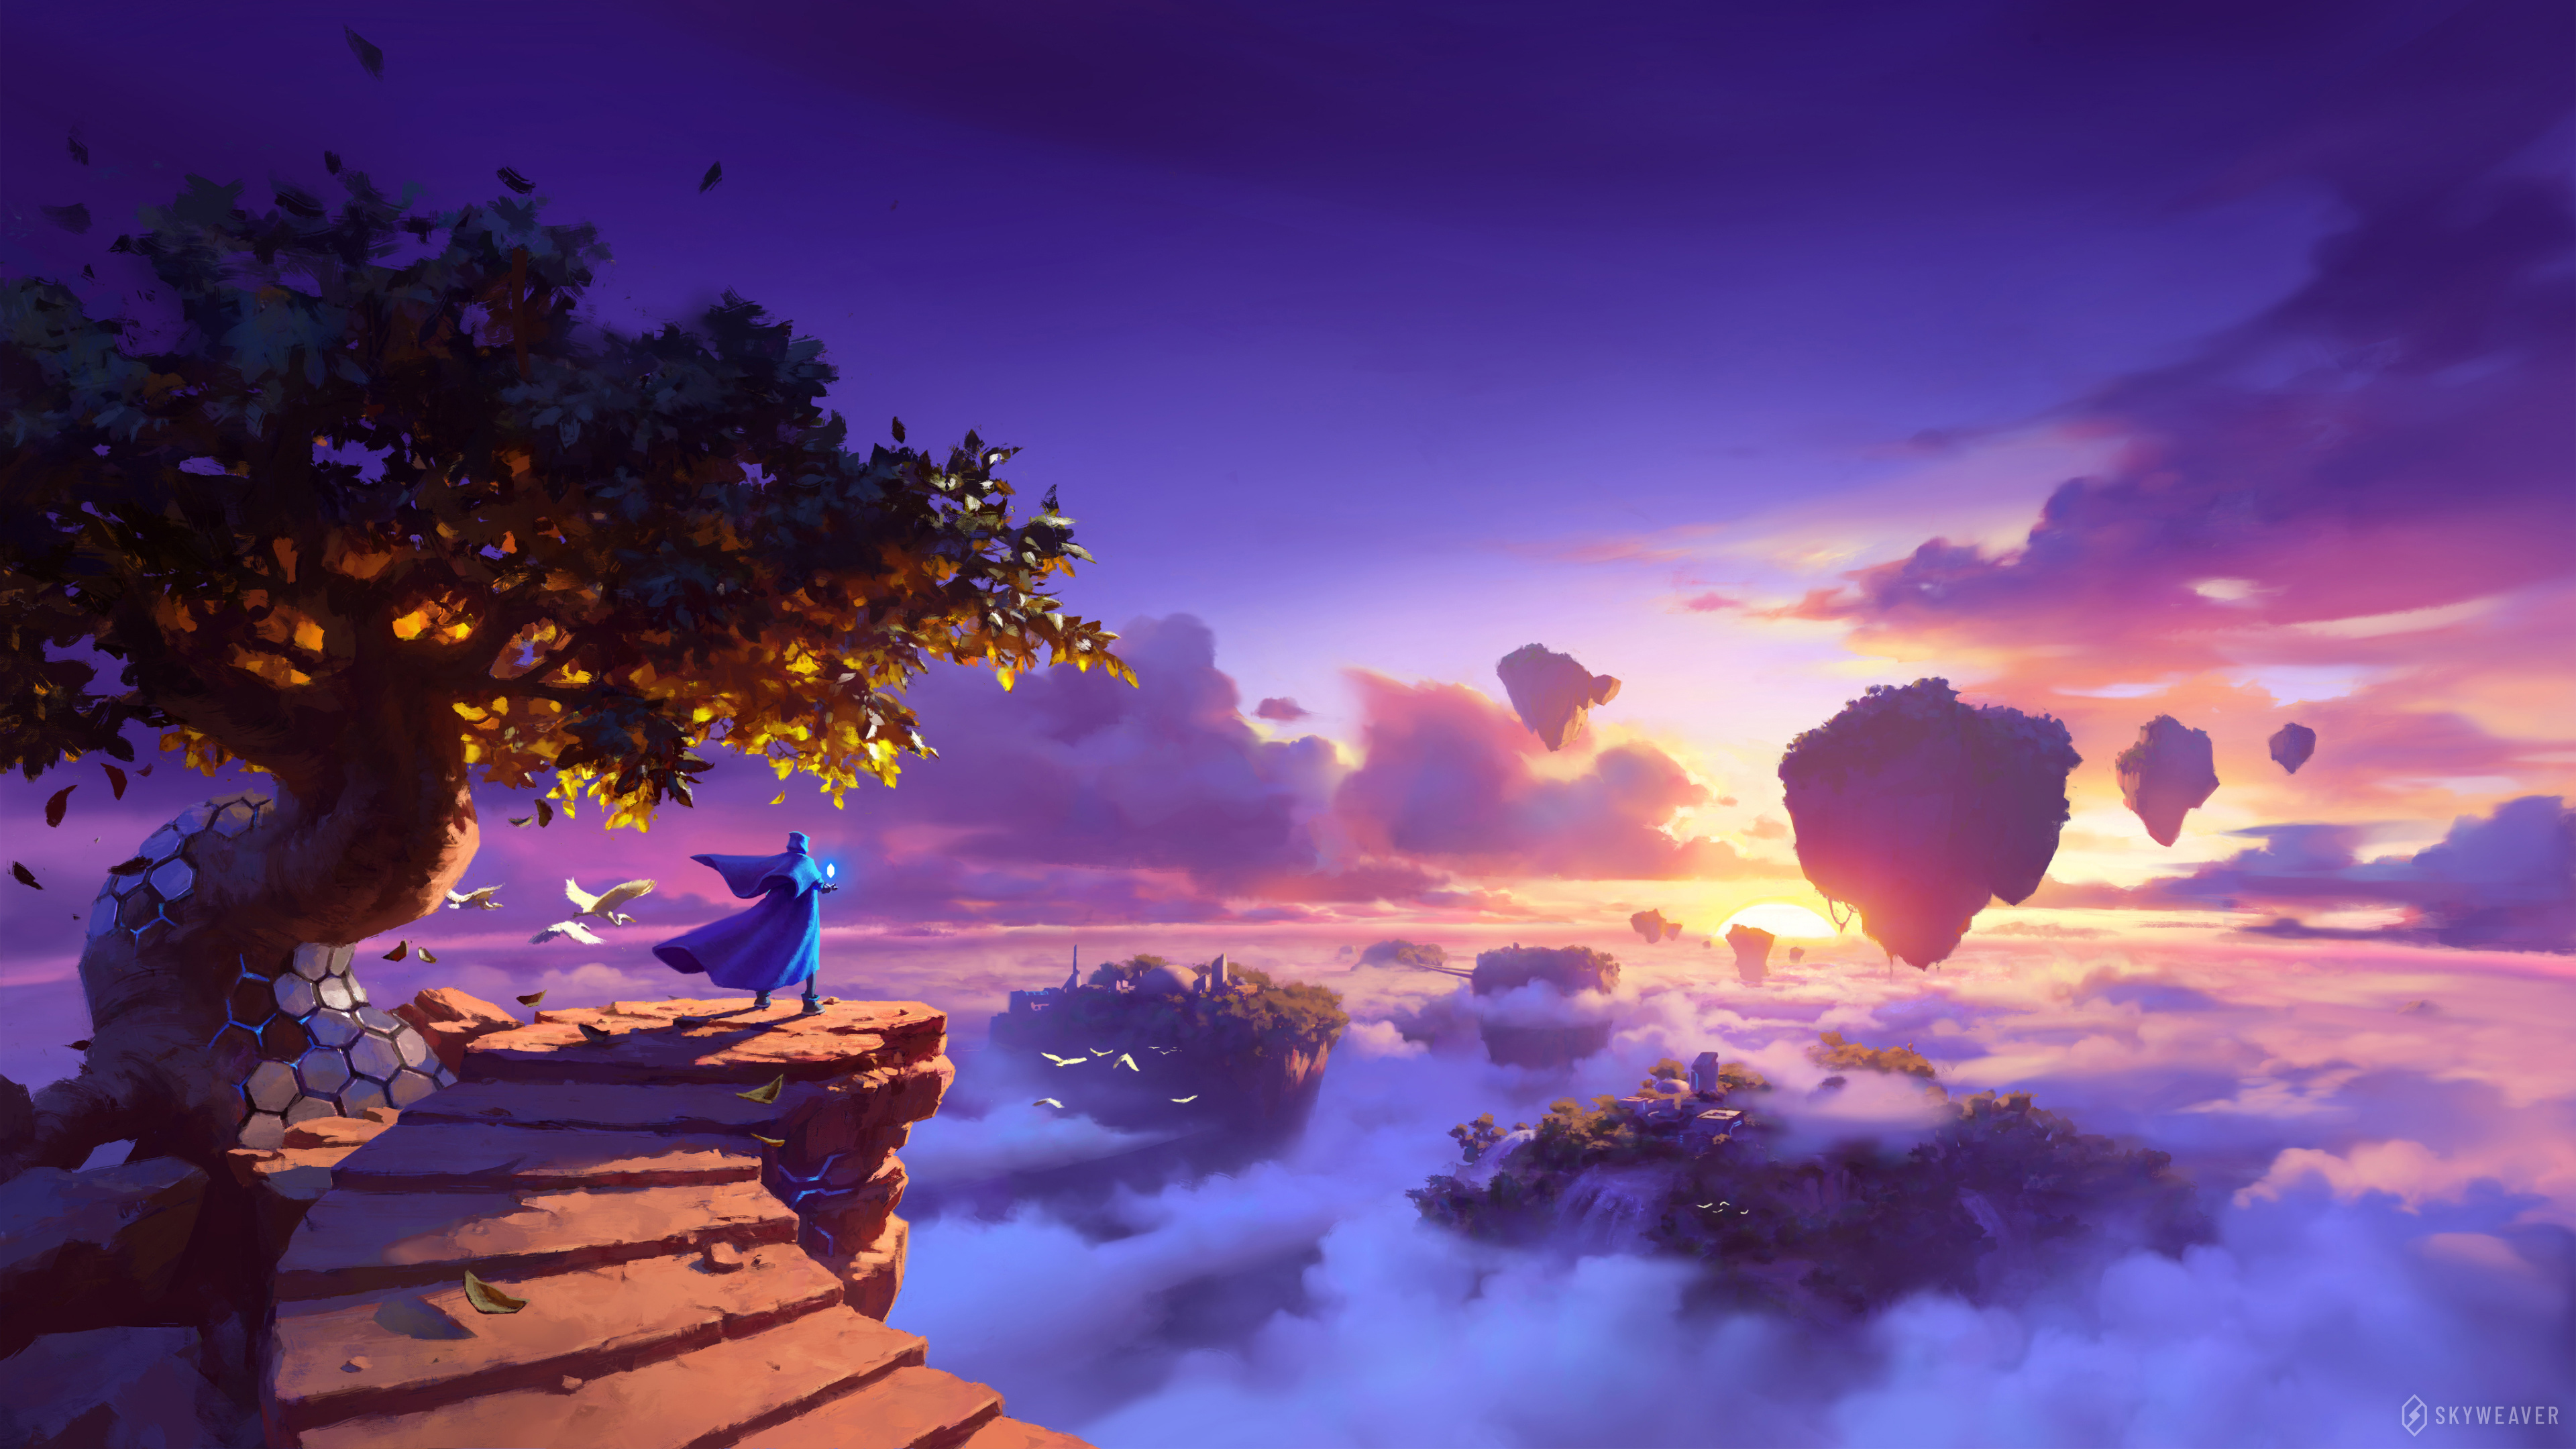

In [2]:
url = "https://www.skyweaver.net/images/media/wallpapers/wallpaper1.jpg"
pil_image = Image.open(BytesIO(requests.get(url).content))
img = AGImage(pil_image)
img

In [4]:
multi_model_message = MultiModalMessage(content=['Describe the content of this image in detail', img], source='user')

In [5]:
model_client = OpenAIChatCompletionClient(model='gpt-4o-mini')
describer = AssistantAgent(
    name="description_agent",
    model_client=model_client,
    system_message="You are good at describing images"
)

response = await describer.on_messages([multi_model_message], cancellation_token=CancellationToken())
reply= response.chat_message.content
display(Markdown(reply))

The image depicts a serene and enchanting landscape, featuring a fantastical world. In the foreground, a winding, rocky pathway leads to a large, gnarled tree with vibrant green leaves, hinting at autumn hues with some leaves falling. The trunk showcases a unique, hexagonal pattern.

Standing on the path is a figure cloaked in a flowing blue robe, facing the horizon. The figure appears to hold a glowing orb or light, adding a sense of mystery. 

In the background, a dynamic sky transitions from warm oranges and yellows to deep purples and blues as the sun sets. Floating islands can be seen hovering in the clouds, each shrouded partially in mist, creating an ethereal atmosphere. The lower part of the image is filled with soft clouds, painting the scene with a dreamy and otherworldly feel. 

Birds can be spotted soaring among the clouds, enhancing the sense of freedom and exploration in this magical setting. Overall, the image conveys a sense of wonder, adventure, and tranquility in a beautifully illustrated fantasy realm.

## Structured Outputs

Autogen AgentChat makes it easy

In [7]:
class ImageDescription(BaseModel):
    scene: str = Field(description="Briefly, the overall scene of the image")
    message: str = Field(description="The point that the image is trying to convey")
    style: str = Field(description="The artistic style of the image")
    orientation: Literal["portrait", "landscape", "square"] = Field(description="The orientation of the image")

In [8]:
model_client = OpenAIChatCompletionClient(model='gpt-4o-mini')

describer = AssistantAgent(
    name="description_agent",
    model_client=model_client,
    system_message="You are good at describing images in detail",
    output_content_type=ImageDescription
)

response = await describer.on_messages([multi_model_message], cancellation_token=CancellationToken())
reply = response.chat_message.content
reply

ImageDescription(scene='A breathtaking fantasy landscape featuring floating islands above a sea of clouds, with a mystical tree and a figure in a blue cloak standing on a rocky platform.', message='The image conveys a sense of adventure and exploration in a magical world, highlighting themes of discovery and wonder.', style='Vibrant and colorful, with a detailed and imaginative illustration style that emphasizes fantasy elements and a dreamlike atmosphere.', orientation='landscape')

In [9]:
import textwrap
print(f"Scene:\n{textwrap.fill(reply.scene)}\n\n")
print(f"Message:\n{textwrap.fill(reply.message)}\n\n")
print(f"Style:\n{textwrap.fill(reply.style)}\n\n")
print(f"Orientation:\n{textwrap.fill(reply.orientation)}\n\n")

Scene:
A breathtaking fantasy landscape featuring floating islands above a
sea of clouds, with a mystical tree and a figure in a blue cloak
standing on a rocky platform.


Message:
The image conveys a sense of adventure and exploration in a magical
world, highlighting themes of discovery and wonder.


Style:
Vibrant and colorful, with a detailed and imaginative illustration
style that emphasizes fantasy elements and a dreamlike atmosphere.


Orientation:
landscape


